# Trading Project

- Using yahoo api to get the price from different companies

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
apple = tickerData.history(period='1d', start='2010-1-1', end= datetime.datetime.now().date())
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2020-09-23 09:28:49,FBN Securities,Outperform,,main
2020-09-23 09:30:06,FBR Capital,Outperform,,main
2020-09-23 09:31:25,JMP Securities,Outperform,,main


In [3]:
import datetime

start_sp = datetime.datetime(2010, 1, 1)
end_sp = datetime.datetime.now().date()

In [4]:
from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)
SP500 = pdr.get_data_yahoo('SPY', start_sp, end_sp)
    
SP500.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-17,333.559998,337.700012,332.989990,335.839996,334.501007,91523300
2020-09-18,335.369995,335.489990,327.970001,330.649994,330.649994,105877900
2020-09-21,325.700012,327.130005,321.730011,326.970001,326.970001,99450800
2020-09-22,328.570007,330.899994,325.859985,330.299988,330.299988,63612100
2020-09-23,330.899994,331.200012,322.100006,322.640015,322.640015,92542900


In [5]:
len(SP500)#2689

2701

### Using Mongodb

In [6]:
import pymongo
from pymongo import MongoClient

In [7]:
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["Stocks"]
mycol = mydb["Tickers"]

In [8]:
# Step 2: Insert Data into DB
SP500.reset_index(inplace=True) # Reset Index
data_dict = SP500.to_dict("records") # Convert to dictionary
mycol.insert_one({"Index":"SPY","data":data_dict}) # inesrt into DB

### Get data from DB

In [9]:
# Step 3: Get data from DB
data_from_db = mycol.find_one({"symbol":"FB"})
FB = pd.DataFrame(data_from_db["data"])
FB.set_index("Date",inplace=True)

In [10]:
#AMZN.to_csv('AMZN.csv')
#AAPL.to_csv('AAPL.csv')
#GOOG.to_csv('GOOG.csv')
#TSLA.to_csv('TSLA.csv')
#MSFT.to_csv('MSFT.csv')
#SPY.to_csv('SPY.csv')
#FB.to_csv('FB.csv')

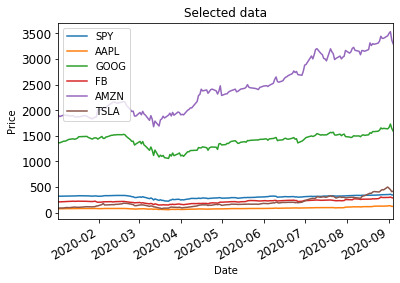

SPY      54.403965
GOOG    315.596611
TSLA     53.110601
MSFT     47.614139
FB       59.147332
AMZN    724.673347
AAPL     20.206789
dtype: float64


In [11]:
def plot_selected(df1, columns, start_index, end_index):
    plot_data(df1.loc[start_index:end_index, columns], title="Selected data")
    

def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date', 'Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
        if symbol == 'SPY':
            df1 = df1.dropna(subset=['SPY'])
    return df1

def normalize_data(df1):
    return df1 / df1.loc[0,:]

def plot_data(df1, title = "Stock prices"):
        ax = df1.plot(title=title, fontsize=12)
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        plt.show()
        
def test_run():
    dates = pd.date_range('2013-01-01', '2020-09-07')
    symbols = ['GOOG', 'TSLA', 'MSFT', 'FB', 'AMZN', "AAPL"]
    #Get stock data
    df1 = get_data(symbols, dates)
    
    plot_selected(df1, ["SPY", "AAPL", "GOOG", "FB", "AMZN", "TSLA"], "2020-01-02", "2020-09-04")
    
    print(df1.std())
    
   
    
if __name__ == "__main__":
    test_run()

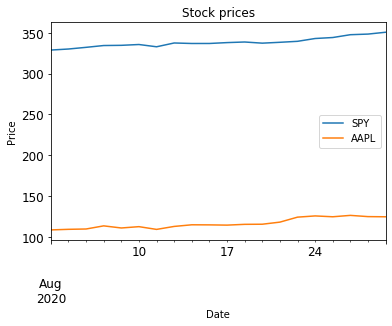

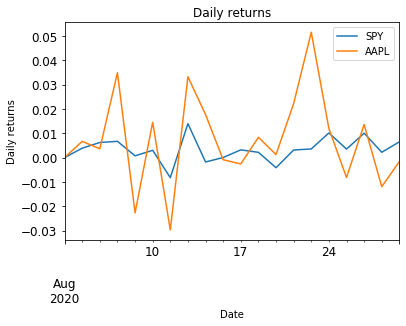

In [12]:
#def plot_selected(df1, columns, start_index, end_index):
  #  plot_data(df1.loc[start_index:end_index, columns], title="Selected data")
    

def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date', 'Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
        if symbol == 'SPY':
            df1 = df1.dropna(subset=['SPY'])
    return df1

def plot_data(df1, title = "Stock prices", xlabel="Date", ylabel="Price"):
        ax = df1.plot(title=title, fontsize=12)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.show()
        
def compute_daily_returns(df1):
    daily_returns = df1.copy()
    
    daily_returns[1:] = (df1[1:] / df1[:-1].values) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns
        
def test_run():
    dates = pd.date_range('2020-08-01', '2020-08-30')
    symbols = ['SPY', 'AAPL']
    #Get stock data
    df1 = get_data(symbols, dates)
    plot_data(df1)
    
    daily_returns = compute_daily_returns(df1)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
   
    
if __name__ == "__main__":
    test_run()

In [13]:
start_date = '2012-06-01' #2010, 1, 1
end_date = datetime.datetime.now().date()#'2020-09-07'
dates = pd.date_range(start_date, end_date)
    #print(dates[0])
df1 = pd.DataFrame(index=dates)#empy dataframe
    #print(df1)
dfSPY = pd.read_csv('data/SPY.csv', index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'],
                    na_values=['nan'])
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    #print(dfSPY)
df1 = df1.join(dfSPY, how = 'inner')
df1 = df1.dropna()
    #print(df1)
    
symbols = ['GOOG', 'TSLA', 'MSFT', 'FB', 'AMZN', 'AAPL']
for symbol in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col='Date', parse_dates=True,
                          usecols=['Date', 'Adj Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
    

In [14]:
df1.tail()

,SPY,GOOG,TSLA,MSFT,FB,AMZN,AAPL
2020-08-31,349.309998,1634.180054,498.320007,225.529999,293.200012,3450.959961,129.039993
2020-09-01,352.600006,1660.709961,475.049988,227.270004,295.440002,3499.120117,134.179993
2020-09-02,357.700012,1728.280029,447.369995,231.649994,302.500000,3531.449951,131.399994
2020-09-03,345.390015,1641.839966,407.000000,217.300003,291.119995,3368.000000,120.879997
2020-09-04,342.570007,1591.040039,418.320007,214.250000,282.730011,3294.620117,120.959999


In [15]:
df = df1.copy()

### Model

In [16]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [17]:
df.shape

(2080, 7)

In [18]:
data = df.filter(['GOOG'])
dataset = data.values #convert to nparray
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1664

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data
#training dataset
train_data = scaled_data[0: training_data_len, :]
#split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00409902, 0.0067137 , 0.00390317, 0.007394  , 0.00659002,
       0.00735279, 0.00324691, 0.0020787 , 0.00070093, 0.        ,
       0.001876  , 0.00405435, 0.00772385, 0.00634264, 0.00211651,
       0.0042708 , 0.00056693, 0.00193441, 0.00352178, 0.00180727,
       0.00722222, 0.00735965, 0.00988846, 0.01266809, 0.00925282,
       0.00926314, 0.00778226, 0.00417115, 0.00392721, 0.00600248,
       0.00545275, 0.00607464, 0.0074593 , 0.01168541, 0.01778754,
       0.01939897, 0.01667089, 0.01681518, 0.01866026, 0.02608175,
       0.0251678 , 0.025398  , 0.02529837, 0.02394807, 0.0282704 ,
       0.02878234, 0.02799896, 0.02857961, 0.02862085, 0.02850059,
       0.03468861, 0.03766065, 0.03727583, 0.03910716, 0.04057427,
       0.04002454, 0.03795269, 0.04058801, 0.04045744, 0.04108621])]
[0.03785304606316087]



In [20]:
#conver x_train and y_train to nparray
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1604, 60, 1)

In [22]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
#compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Train on 1604 samples
1604/1604 [==============================] - 105s 65ms/sample - loss: 8.4710e-04


In [25]:
#creat testing data set
test_data = scaled_data[training_data_len - 60:, :]
#create x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])


In [26]:
#convert data to nparray
x_test = np.array(x_test)
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(416, 60, 1)

In [27]:
#models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [28]:
# get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.052108764648437

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


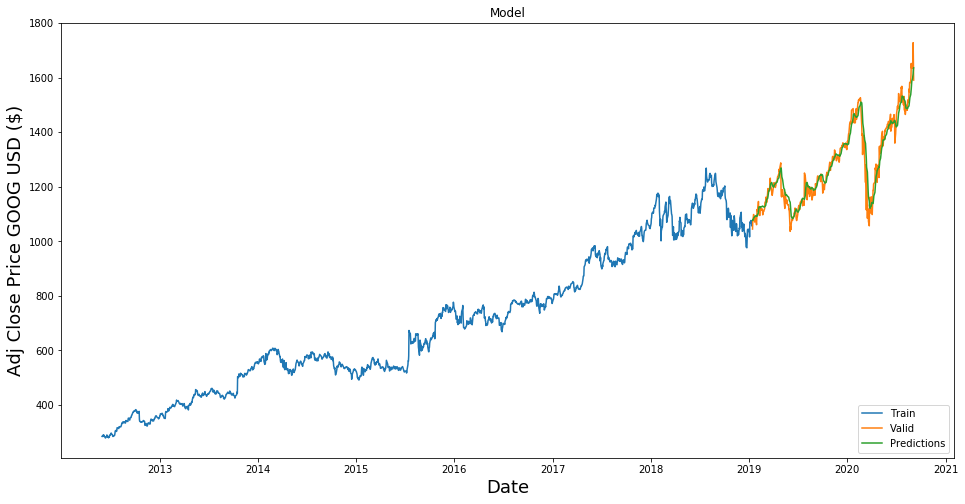

In [29]:
#plot
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price GOOG USD ($)', fontsize=18)
plt.plot(train['GOOG'])
plt.plot(valid[['GOOG', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [30]:
#show valid and predicted prices
valid

,SPY,GOOG,TSLA,MSFT,FB,AMZN,AAPL,Predictions
2019-01-14,250.039413,1044.689941,66.879997,99.769432,145.389999,1617.209961,36.691772,1077.103516
2019-01-15,252.905075,1077.150024,68.886002,102.663292,148.949997,1674.560059,37.442734,1076.076050
2019-01-16,253.517014,1080.969971,69.209999,103.025009,147.539993,1683.780029,37.900158,1077.667480
2019-01-17,255.440445,1089.900024,69.461998,103.748474,148.300003,1693.219971,38.125195,1080.513794
2019-01-18,258.840332,1098.260010,60.452000,105.302940,150.039993,1696.199951,38.360023,1084.718994
...,...,...,...,...,...,...,...,...
2020-08-31,349.309998,1634.180054,498.320007,225.529999,293.200012,3450.959961,129.039993,1597.682983
2020-09-01,352.600006,1660.709961,475.049988,227.270004,295.440002,3499.120117,134.179993,1605.448242
2020-09-02,357.700012,1728.280029,447.369995,231.649994,302.500000,3531.449951,131.399994,1614.193726
2020-09-03,345.390015,1641.839966,407.000000,217.300003,291.119995,3368.000000,120.879997,1630.518066


In [47]:
tick_pred = pdr.get_data_yahoo('AMZN', start="2010-01-01", end=datetime.datetime.now().date())#"2020-09-25")#start_sp, end_sp)
n_df = tick_pred.filter(['Close'])
last_60_days = n_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[2719.0325]]


In [48]:
tick_pred = pdr.get_data_yahoo('AMZN', start="2020-09-24", end=datetime.datetime.now().date())#end_sp)
print(apple_pred['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2020-09-23    2999.860107
2020-09-24    3029.600098
Name: Close, dtype: float64


In [49]:
mydb = myclient["Tick_Pred"]
mycol = mydb["Tick_Pred"]

In [50]:
tick_pred.reset_index(inplace=True) # Reset Index
data_dict = tick_pred.to_dict("records") # Convert to dictionary
mycol.insert_one({"Index":"Tick_Pred","data":data_dict}) # inesrt into DB

In [41]:
#adding a title and an image
st.write("""
# Stock Market Application
Visually show data on stock! Date from....
""")

image = Image.open("stock.jpg")
st.image(image, use_column_width=True)

#sidebar header
st.sidebar.header('User Imput')

#funtion to get the users input
def get_input():
   
    start_date = st.sidebar.text_input("Start Date", "2020-08-01")
    end_date = st.sidebar.text_input("Etart Date", "2020-09-04")
    stock_symbol = st.sidebar.text_input("Stock Symbol", "GOOG")
    return start_date, end_date, stock_symbol

#function to get the company name
def get_comp_name(symbol):
    if symbol == "AMZN":
        return 'Amazon'
    elif symbol == "AAPL":
        return 'Appel'
    elif symbol == "GOOG":
        return 'Alphabet'
    elif symbol == "TSLA":
        return "Tesla"
    elif symbol == "MSFT":
        return "Microsoft"
    elif symbol == "FB":
        return "FaceBook"
    else: 
        "None"
        
#function to get the companies time frame
def get_data(symbol, start, end):
    
    #load data
    if symbol.upper() == "AMZN":
        df = pd.read_csv('data/AMZN.csv')
    elif symbol.upper() == "GOOG":
        df = pd.read_csv('data/GOOG.csv')
    elif symbol.upper() == "TSLA":
        df = pd.read_csv('data/TSLA.csv')
    elif symbol.upper() == "MSFT":
        df = pd.read_csv('data/MSFT.csv')
    elif symbol.upper() == "FB":
        df = pd.read_csv('data/FB.csv') 
    elif symbol.upper() == "AAPL":
        df = pd.read_csv('data/AAPL.csv')
        

    #get the date range
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    #set start and end index
    start_row = 0
    end_row = 0

    #start the date from the top of the dataset
    for i in range(0, len(df)):
        if start <= pd.to_datetime(df['Date'][i]):
            start_row = i
            break
            
    #start from the bottom of the dataset
    for j in range(0, len(df)):
        if end >= pd.to_datetime(df['Date'][len(df)-1-j]):
            end_row = len(df) - 1 - j
            break
            
    #set index to the date
    df = df.set_index(pd.DatetimeIndex(df['Date'].values))
    
    return df.iloc[start_row: end_row +1, :]

#get users input
start, end, symbol = get_input()
#get date
df = get_data(symbol, start, end)
#get the company name
company_name = get_comp_name(symbol.upper())

#dispaly the Adj Close price
st.header(company_name+"Adj Close Price\n")
st.line_chart(df['Adj Close'])

#dispaly the Volume
st.header(company_name+"Volume\n")
st.line_chart(df['Volume'])

#get statistics 
st.header('Data Statistics')
st.write(df.describe())

algo = st.sidebar.text_input('predictions')